In [ ]:
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import imutils
from skimage.measure import label, regionprops, regionprops_table
import random
import sys

1. Programmez la transformation du photomaton. Faites en sorte que le
programme fonctionne quelles que soient les dimensions de l'image
(pourvu qu'il y ait un nombre pair de lignes et de colonnes).



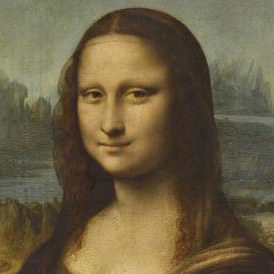

In [ ]:
#loading image
image = io.imread('/content/MonaLisa_square.jpg')

# converting to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#showing image
cv2_imshow(image)

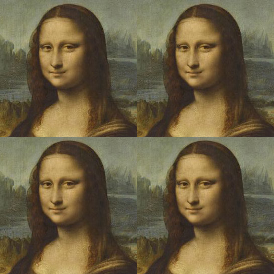

In [ ]:
# now we need to apply the changes in the pixels' position

# get image's shape
h, l, n = np.shape(image)

#array that is going to store our future phoomaton image
photomaton_image = np.zeros((h, l, n))

#iterate over each group of 2x2 pixels
#we need to go until h-h%2 and l-l%2 intead of h and l, to ensure that the number of iterations is even
#if we have an image with an odd dimension, the last row or column will be left behind
for i in range(0,h-h%2,2):
  for j in range(0,l-l%2,2):

    #following the general formula we have:
    # (i,j) -> (i/2, j/2)
    photomaton_image[int(i/2),int(j/2)] = image[i,j]

    # (i+1,j) -> (h/2+i/2, j/2)
    photomaton_image[int(h/2+i/2),int(j/2)] = image[i+1,j]

    # (i,j+1) -> (i/2, l/2+j/2)
    photomaton_image[int(i/2),int(l/2+j/2)] = image[i,j+1]

    # (i+1,j+1) -> (h/2+i/2, l/2+j/2)
    photomaton_image[int(h/2+i/2),int(l/2+j/2)] = image[i+1,j+1]

cv2_imshow(photomaton_image)

        

In [ ]:
# now we gather all we did above in one function

def photomaton_transorm(image):
    
  # get image's shape
  h, l, n = np.shape(image)

  #array that is going to store our future phoomaton image
  photomaton_image = np.zeros((h, l, n))

  #iterate over each group of 2x2 pixels
  for i in range(0,h-h%2,2):
    for j in range(0,l-l%2,2):
      #following the general formula we have:
      # (i,j) -> (i/2, j/2)
      photomaton_image[int(i/2),int(j/2)] = image[i,j]

      # (i+1,j) -> (h/2+i/2, j/2)
      photomaton_image[int(h/2+i/2),int(j/2)] = image[i+1,j]

      # (i,j+1) -> (i/2, l/2+j/2)
      photomaton_image[int(i/2),int(l/2+j/2)] = image[i,j+1]

      # (i+1,j+1) -> (h/2+i/2, l/2+j/2)
      photomaton_image[int(h/2+i/2),int(l/2+j/2)] = image[i+1,j+1]

  return photomaton_image



1th transform


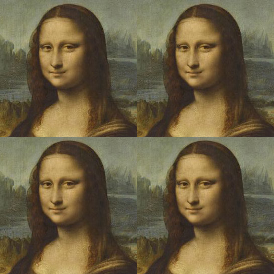



2th transform


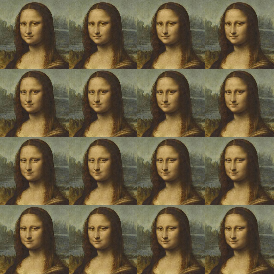



3th transform


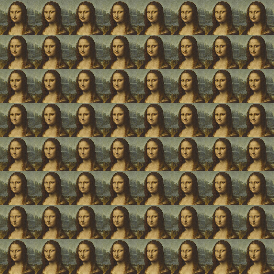



4th transform


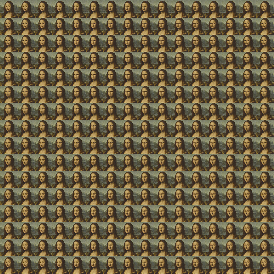



5th transform


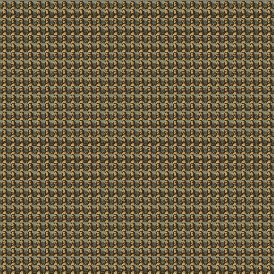



6th transform


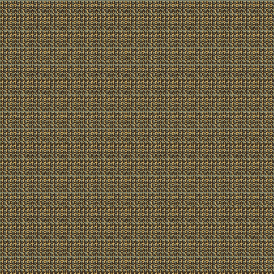



7th transform


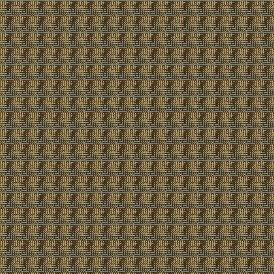



8th transform


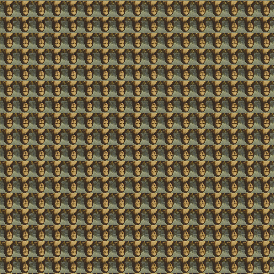



9th transform


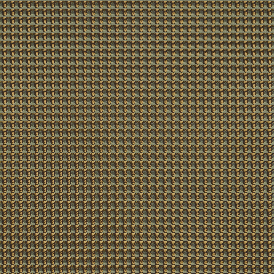



10th transform


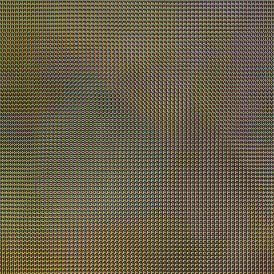



11th transform


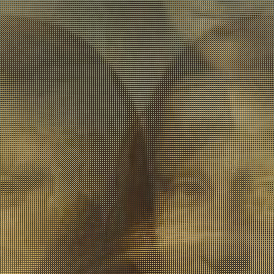



12th transform


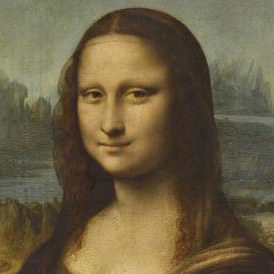

In [ ]:
# now, lets perform the photomaton transform nine times to see what we get
# fig, axs = plt.subplots(9, figsize = (40,20))

#loading image
image = io.imread('/content/MonaLisa_square.jpg')


# converting to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# apply the photomaton transorm 12 times
for i in range(12):
  print(f"\n\n{i+1}th transform")
  image = photomaton_transorm(image)
  cv2_imshow(image)


2. Les drapeaux : quelques heures après les attentats de Paris du 13
novembre 2015, Facebook activait une option temporaire pour habiller les
photos de profil de ses utilisateurs aux couleurs du drapeau français. Très
vite, le réseau social s'est coloré de bleu, blanc, rouge pour marquer sa
solidarité avec les victimes. Ce procédé pourrait fort heureusement être
utilisé dans des circonstances moins dramatiques, par exemple pour
marquer son soutien à son équipe sportive préférée

picture:


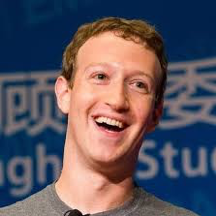

flag:


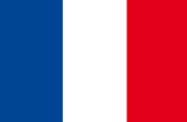

In [ ]:
#load picture
picture = io.imread('/content/Mark.png')

# converting to RGB
picture = cv.cvtColor(picture, cv.COLOR_BGR2RGB)

#showing picture
print("picture:")
cv2_imshow(picture)

#load flag
flag = io.imread('/content/France.png')

# converting to RGB
flag = cv.cvtColor(flag, cv.COLOR_BGR2RGB)

#showing flag
print("flag:")
cv2_imshow(flag)

In [ ]:
def blend_images(image1, image2, alpha):
  #get images' dimensions
  h_1,l_1, n = np.shape(image1)
  h_2,l_2, n = np.shape(image2)

  #initializate zero array to store final image
  blended_img = np.zeros((h_1,l_1, n))

  for i in range(h_1):
    for j in range(l_1):
      # Since the images are not the same size, we must work with  pixels with the
      # same relative position in their respective images. 
      # For example, the central pixel of the picture must be added to the central pixel of the flag.
      # For this we must find the indices of the flag that correspond to the 
      # indices of the picture

      i_2 = int(i*h_2/h_1)
      j_2 = int(j*l_2/l_1)

      # lastely, we do a weighted average between the two images two be merged.
      # the weight will be alpha and 1-alpha, where alpha is the presence of the image1
      # in the final image
      blended_img[i,j] = alpha*image1[i,j] + (1-alpha)*image2[i_2, j_2]

  return blended_img

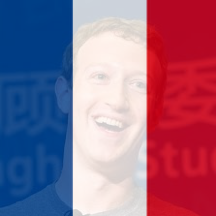

In [ ]:
blended_img = blend_images(picture, flag, 0.2)
  
cv2_imshow(blended_img)

3. Égalisation exacte d’histogramme. Transformer une image en niveaux de
gris ([0, 1, …, 255]) pour obtenir une image dont l'histogramme est
complètement plat. On suppose le nombre de pixels de l'image comme
étant un multiple de 256. Les méthodes automatiques ne différencient pas
les pixels de même intensité et par conséquent ne peuvent pas aboutir à
un tel histogramme plat. Une solution possible consiste à établir un ordre
strict des pixels selon leur intensité, mais aussi en considérant l'intensité de
leurs voisins. A partir de cet ordre, l'égalisation peut être réalisée en
regroupant les pixels selon leur ordre : les n premiers se verront attribuer
l'intensité 0, les n seconds, l'intensité 1, ... de telle sorte que chaque groupe
ait le même nombre de pixels. Voici un exemple (image originale /
égalisation classique / égalisation exacte) :

In [ ]:
#function to convert from rgb to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
def equalize_hist(image):
    #image must be in gray scale

    h,l = np.shape(image)

    # assert h*l%256 == 0
    
    # matrix to vector
    vector = image.reshape(h*l)
    
    #create result image. For now just zeros vector
    result_vector = np.zeros(h*l)
    
    # sort image vector
    sorted_vector = np.sort(vector, axis=None)

    # Get the position of each pixel of the sorted image in the original image 
    sorted_indexes = np.array(np.argsort(vector)).reshape(h*l)

    # Define how much we want of pixels in each bin
    binSize = (h*l) //256  # The number of pixels we should have in each bin
    
    grayLevel = 0
    for i in range(0, h*l,binSize ):
        sorted_vector[i : i + binSize] = grayLevel;
        grayLevel = grayLevel + 1
        
    for i in range(h*l):
        result_vector[sorted_indexes[i]] = sorted_vector[i]
        
    result_vector = result_vector.reshape((h,l))
        
    return result_vector.astype(np.uint8)


image before equalization



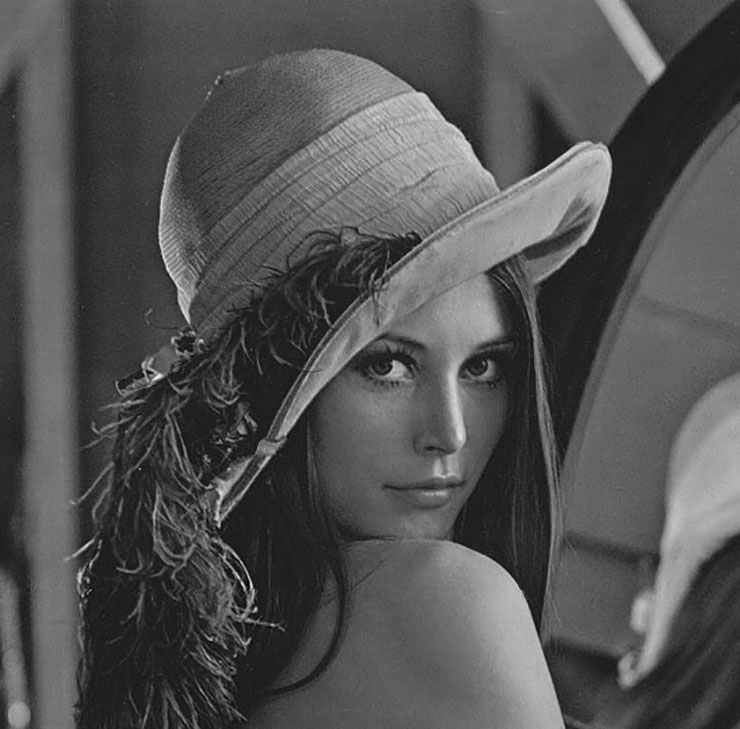


image after equalization



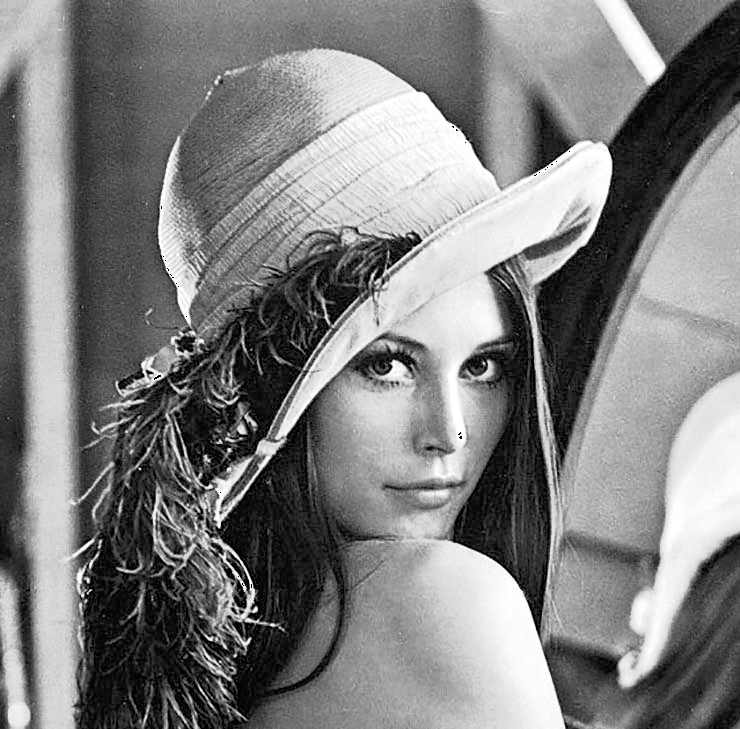

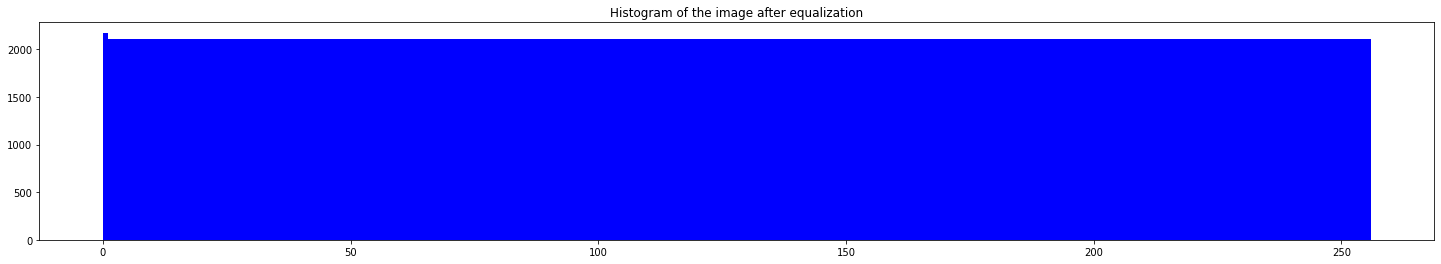

In [ ]:
#loading image
image = io.imread('Lena.jpg')

# converting to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# # Convert RGB to grayscale
image = (rgb2gray(image)).astype('uint8')  

print("\nimage before equalization\n")
cv2_imshow(image)

# apply histogram equalizer function to the image
eq_image = equalize_hist(image)


print("\nimage after equalization\n")
cv2_imshow(eq_image)

#show final histogram
plt.hist(eq_image.flatten(),256,[0,256], color = 'b')
fig = plt.gcf()
fig.set_figwidth(25)
#set title
plt.title("Histogram of the image after equalization")
plt.show()

4. All RGB. Ce projet consiste à transformer une image source en une image
transformée contenant une et une fois chaque triplet de couleur RGB.
Voici un exemple :

allrgb lena:


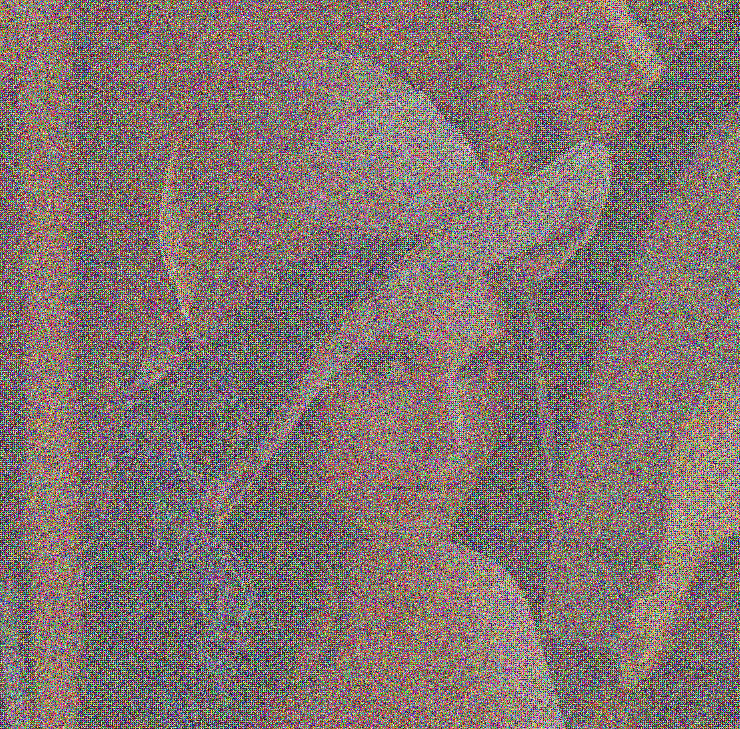

In [ ]:
#loading image
image = io.imread('Lena.jpg')

# converting to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#define all rgb function
def allRGB(img):
    # get input shapes
    L, H = np.shape(img)

    #create output image
    allrgb = np.zeros(L,H,3)

    #fill output image with random colors
    for i in range(len(img)):
      for j in range(len(img[0,:,:])):
        for k in range(3):
          allrgb[i,j,k] = random.randint(0, 255)

    # 1 over 4 pixels of the output image should be the same as the input one
    for i in range(0,len(img),2):
      for j in range(0,len(img[0,:,:]),2):
        allrgb[i,j] = img[i,j]
    
    #with this algorithm we do not guarantee that we will have all possible 
    #colors, as this will require a lot of computational power.
    #For our case, we used random colors, which may have been repeated before.
    #However, the difference in the final result is imperceptible to the human eye.
    return allrgb

print("allrgb lena:")
cv2_imshow(imageAllRGB)

5. Mesures. Effectuez toutes les mesures nécessaires pour reproduire la pièce
représentée dans la figure piece.tif.

height:  455
width:  301


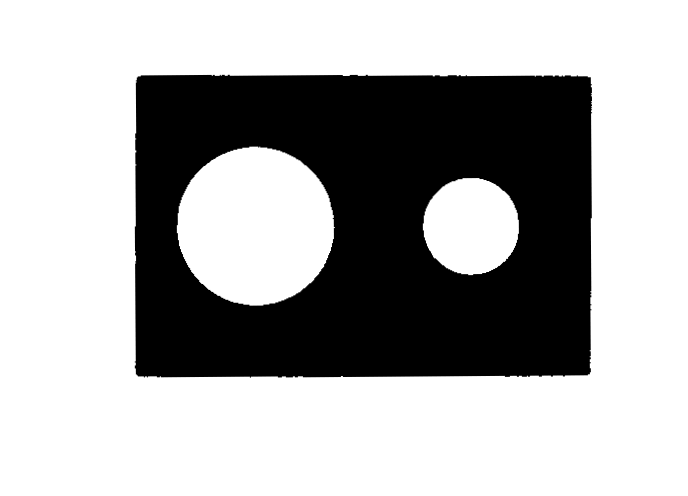

In [ ]:
#loading image
piece = io.imread('piece.tif')

# apply threshold
for i in range(len(piece)):
  for j in range(len(piece[0, :])):
    if piece[i,j] < 255/2:
      piece[i,j] = 0
    else:
      piece[i,j] = 255


# correct rotation
piece = imutils.rotate(piece, angle=0.4) 

# cut image borders
border = 40
piece = piece[border:-border,border:-border]

# here the height of the image will be calculated by finding the number of rows
# that have a black pixel on it
cols_with_black = 0

for col in np.transpose(piece):
  if len(col[col == 0]) > 40:
    cols_with_black += 1

# the same will be done to the width, this time finding the number of rows
rows_with_black = 0
for row in piece:
  if len(row[row == 0]) > 40:
    rows_with_black += 1

print("height: ", cols_with_black)
print("width: ", rows_with_black)

cv2_imshow(piece)

# cv2_imshow(Rotated1_piece) 
# cv2.waitKey(0) 

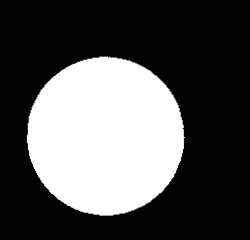

diameter1:  156





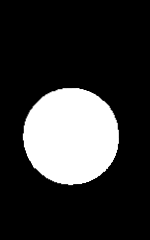

diameter2:  95


In [ ]:
# now we need to find the diameters

# find image with only the holes
first_hole = piece[90:330, 150:400]
# first_hole = np.transpose(first_hole)
cv2_imshow(first_hole)

white_list1 = []

# get, for each column, the number of white pixels and append to the list
for col in first_hole:
  white_list1.append(len(col[col==255]))

# the max of the list is equal to the biggest vertical gap in the hole = diameter
diameter1 = max(white_list1)

print("diameter1: ", diameter1)

print("\n\n")

#do the same to the second role

second_hole = piece[90:330, 400:550]

cv2_imshow(second_hole)

white_list2 = []
for col in second_hole:
  white_list2.append(len(col[col==255]))

diameter2 = max(white_list2)

print("diameter2: ", diameter2)

In [ ]:
# in short we have

print(f"height: {rows_with_black} pixels")
print(f"width: {cols_with_black} pixels")
print(f"diameter1: {diameter1} pixels")
print(f"diameter2: {diameter2} pixels")

print(f"\n\nSince my screen height is 768 pixels and in cm it is 19,5, 1 cm is equal to {768/19.5}\n\n")

a = 768/19.5

print(f"height: {rows_with_black/a} cm")
print(f"width: {cols_with_black/a} cm")
print(f"diameter1: {diameter1/a} cm")
print(f"diameter2: {diameter2/a} cm")

height: 301 pixels
width: 455 pixels
diameter1: 156 pixels
diameter2: 95 pixels


Since my screen height is 768 pixels and in cm it is 19,5, 1 cm is equal to 39.38461538461539


height: 7.642578125 cm
width: 11.552734375 cm
diameter1: 3.9609375 cm
diameter2: 2.412109375 cm


6. Classification. We propose to create a program (script) to classify the objects in
the RondelDent image into washers and cogwheels, each time displaying the
number of objects of each type. To do this, you must respectively:
- perform individual measurements on objects,
- analyse these measures,
- filter objects according to carefully chosen attributes,
- jointly display the number of objects of each type
Test the program on the two test images (RondelDent 1 and RondelDent 2)

In [ ]:
# define a function to calculate the diameter of a image, in a provided axis
def get_diam(image, axis):
  # Consider that the cicle is white, and the background is black
  # the diameter will be the largest amount of white pixels in a column, or in a row,
  # depending on the "axis" input
  image = rgb2gray(image)

  not_black_list = []

  # if axis == 1, we trasnpose the image, same result as turn it 90 degrees.
  if axis == 1:
    image = np.transpose(image)

  # number of not black pixels for each column
  for col in image:
    not_black_list.append(len(col[col>20]))
    

  # the max of the list is equal to the biggest vertical gap in the hole = diameter
  diameter = max(not_black_list)

  return diameter

In [ ]:
# inverte thresholded image colors
def inv_bin_colors(img):
  for i in range(len(img)):
    for j in range(len(img[0,:])):
      if img[i,j] == 0:
        img[i,j] = 255
      else:
        img[i,j] = 0
    
  return img

In [ ]:
def get_washers_and_cogwheels(image):

  # Threshold your image to make sure that is binary
  thresh_type = cv.THRESH_BINARY + cv.THRESH_OTSU
  _, binary_image = cv.threshold(image, 0, 255, thresh_type)

  # inverte colors
  binary_image = inv_bin_colors(binary_image)

  # Perform connected component labeling
  n_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary_image,
                                                                        connectivity=4)
  
  # Create false color image where every different object will have a different color
  colors = np.random.randint(0, 255, size=(n_labels , 3), dtype=np.uint8)
  colors[0] = [0,0,0]  # for cosmetic reason we want the background black
  false_colors = colors[labels]

  # cv2_imshow(false_colors)

  # list to store only desired images
  images = []

  # Final image containing only desired objects
  filtered_image = np.zeros(np.shape(false_colors))

  # iterate over diferent objects
  for color in colors:

    # transorm colors into black/white image
    new_image = np.zeros(np.shape(false_colors))

    for i in range(len(binary_image)):
      for j in range(len(binary_image[0,:])):
        if all(false_colors[i,j] == color):
          new_image[i,j] = 255
        else:
          new_image[i,j] = 0

    #get diamenter1 from object (vertical)
    diameter1 = get_diam(new_image,0)

    #get diamenter2 from object (horizontal)
    diameter2 = get_diam(new_image,1)

    #get diamenter3 from object (30 degrees rotation)
    diameter3 = get_diam(imutils.rotate(new_image, angle=30), 0)

    # bool saying if object is big enough
    is_big_enough = len(new_image[new_image != 0]) > 1000

    # bool saying if object has 90 degrees symmetry, by comparing its diameters.
    ninety_degree_symmetry = 0.95 < diameter1/diameter2 < 1.05

    # bool saying if object has 60 degrees symmetry, by comparing its diameters.
    sixty_degree_symmetry = 0.95 < diameter1/max(diameter3,1) < 1.05

    # bool saying if object respects all three conditions, if so, it's either a washers or
    # a cogwheel

    condition = is_big_enough and ninety_degree_symmetry and sixty_degree_symmetry

    # put to images list only objects respecting the conditions
    if condition:
      images.append(new_image)

  # cv2_imshow(filtered_image)
    # get images with disered shapes

  # merge all desired object together
  for img in images:
    filtered_image += img

  cv2_imshow(filtered_image)

  print(f"the number of washers or cogwheels is {len(images)}")

  return len(images)

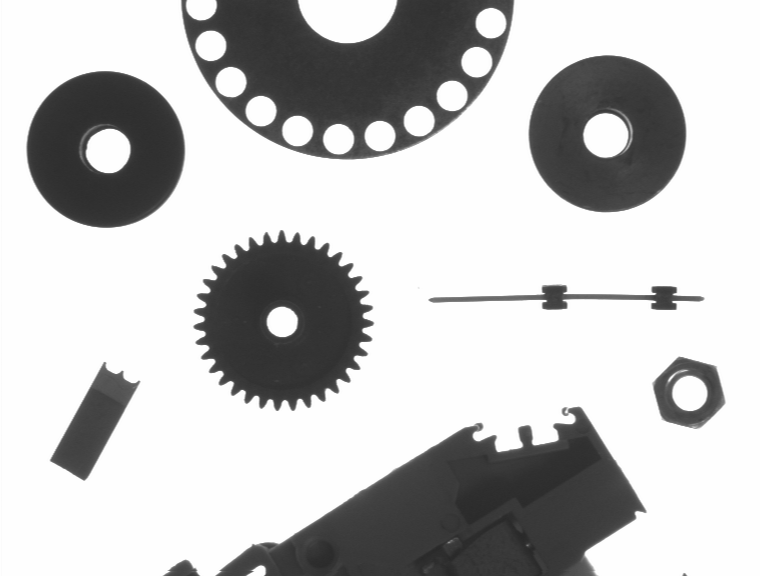

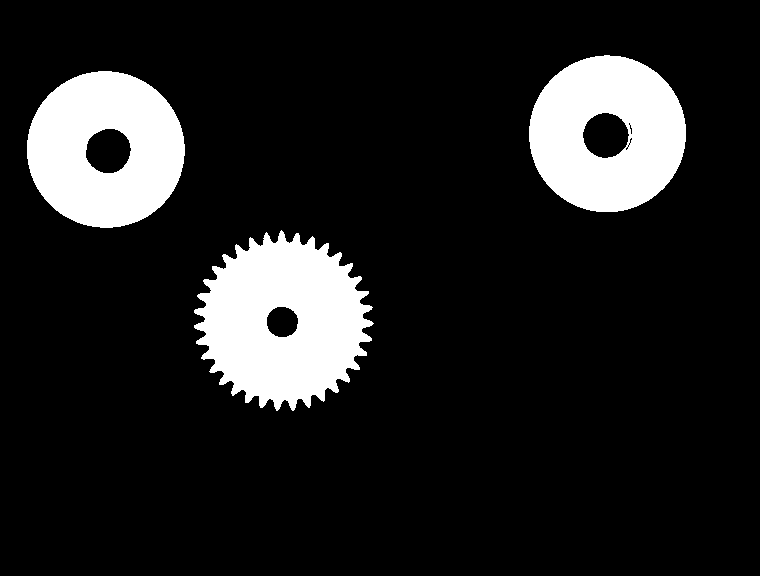

the number of washers or cogwheels is 3


3

In [ ]:
image = io.imread('rondeldent1.tif')

cv2_imshow(image)

get_washers_and_cogwheels(image)

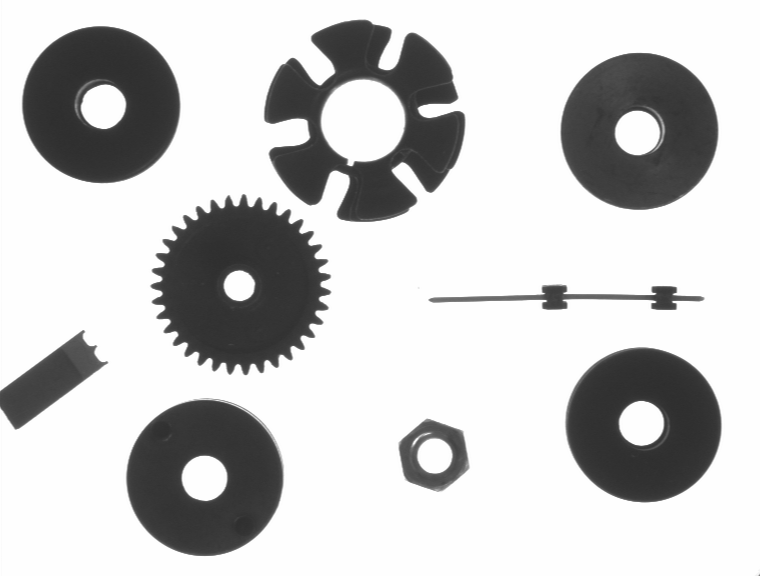

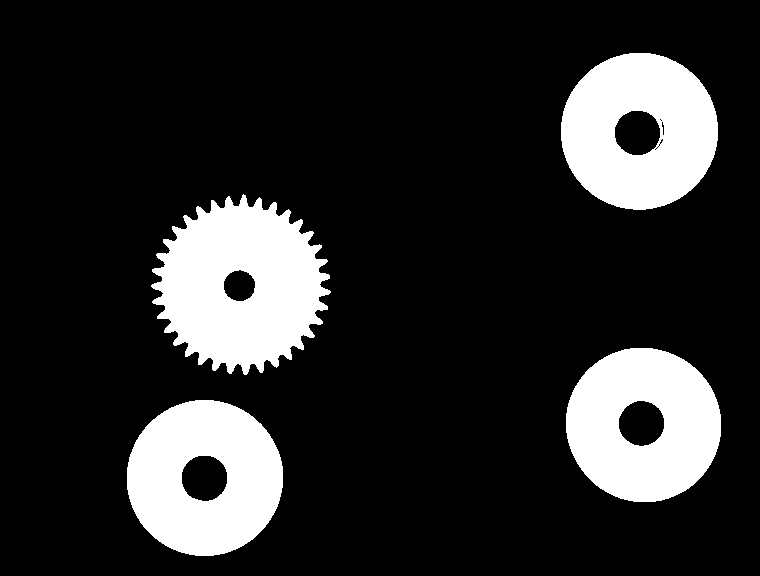

the number of washers or cogwheels is 4


4

In [ ]:
image = io.imread('rondeldent2.tif')

cv2_imshow(image)

get_washers_and_cogwheels(image)